In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydrophone_data_processing import load, preprocessing

In [2]:
days = dict(
# day122 = pd.to_datetime('2019-05-02'),
# day123 = pd.to_datetime('2019-05-03'),
day138 = pd.to_datetime('2019-05-18'),
day140 = pd.to_datetime('2019-05-20'),
day221 = pd.to_datetime('2019-08-09'),
day222 = pd.to_datetime('2019-08-10'),
day272 = pd.to_datetime('2019-09-29'),
day274 = pd.to_datetime('2019-10-01'),
# day297 = pd.to_datetime('2019-10-24'),
day342 = pd.to_datetime('2019-12-08'),
day007 = pd.to_datetime('2020-01-07'),
day010 = pd.to_datetime('2020-01-11'),
# day033 = pd.to_datetime('2020-02-02'),
)

In [3]:
!ls /media/sda/data/robdata/tremors/*138*.mseed

/media/sda/data/robdata/tremors/138.mseed


In [166]:

day138 = load.get_raw_stream(paths=('/media/sda/data/robdata/tremors/138.mseed',))

In [167]:
day138.integrate()

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.007000Z | 10.0 Hz, 863982 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.840000Z | 10.0 Hz, 863994 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.089000Z | 10.0 Hz, 864005 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.041000Z | 10.0 Hz, 863988 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.271000Z | 10.0 Hz, 863984 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.292000Z | 10.0 Hz, 863992 samples

In [173]:
str(day138[0].stats.starttime).split('T')[0]

'2019-05-18'

(0.0, 88000.0)

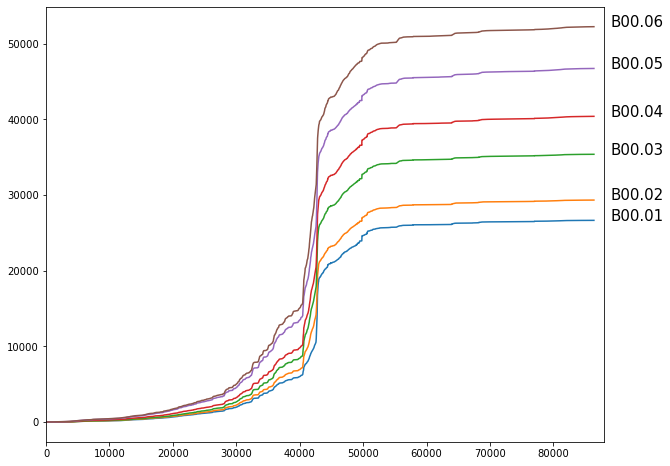

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))

for tr in day138:
    station_name = tr.stats.station + '.' + tr.stats.location
    ax.plot(tr.times(), tr.data)
    ax.text(s=station_name, x=89000, y=tr.data.max()
           ,fontsize=15)
    
ax.set_xlim(0, 88000)

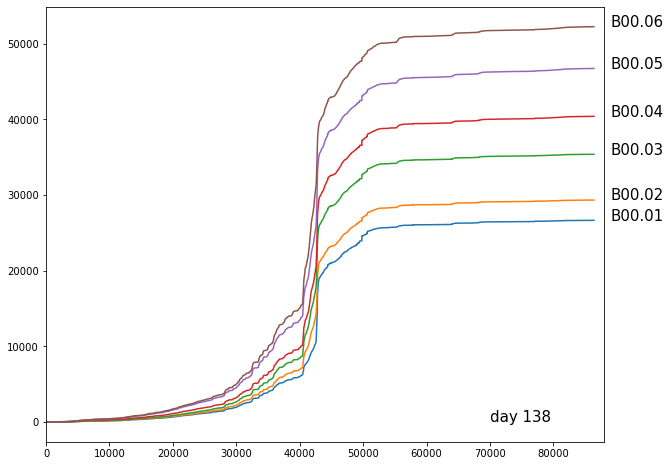

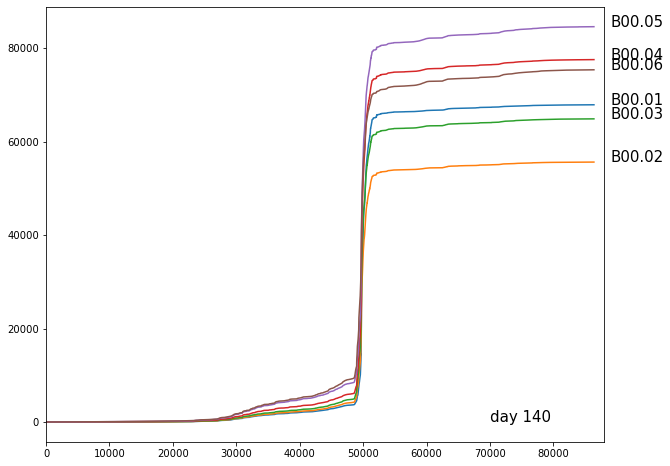

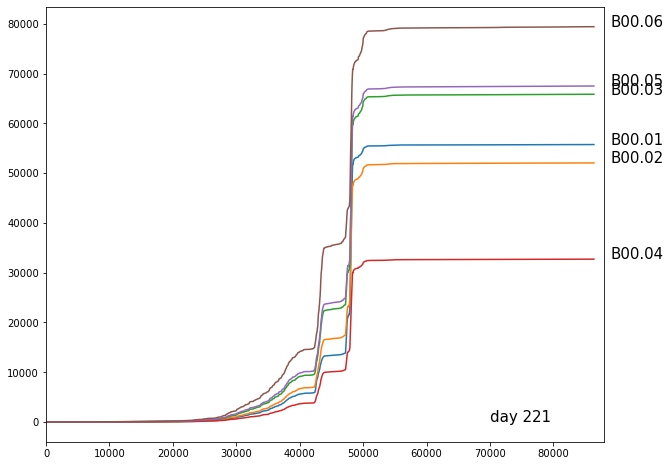

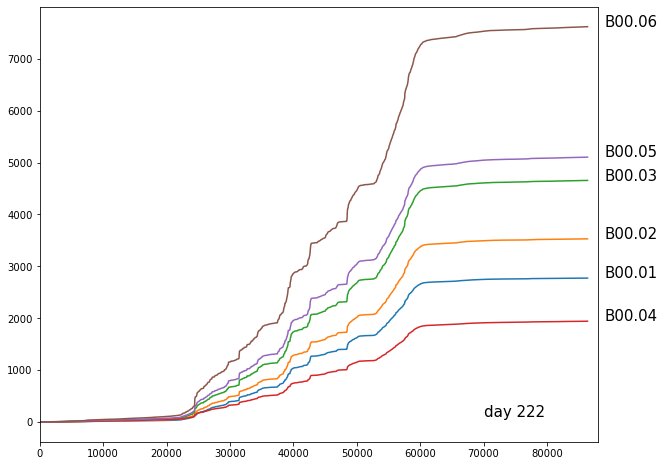

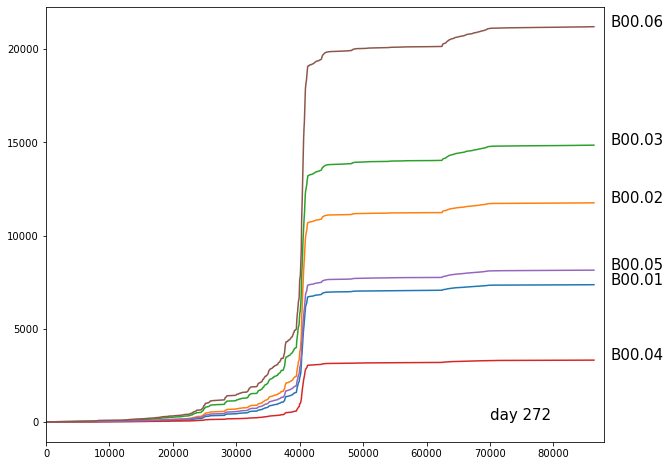

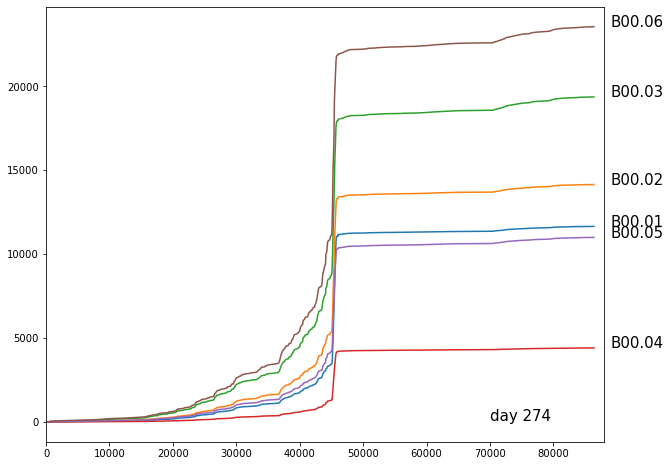

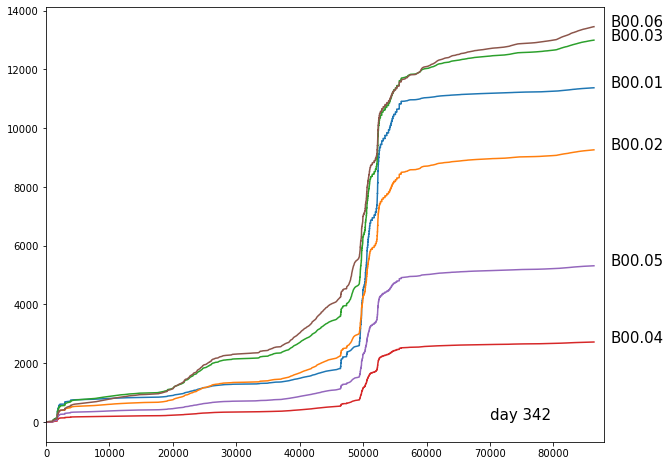

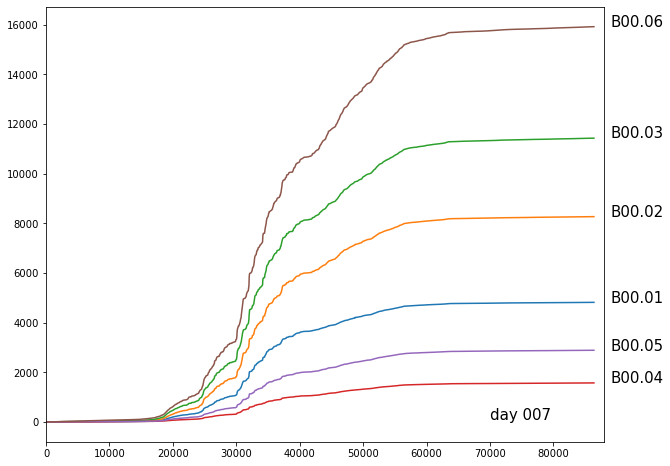

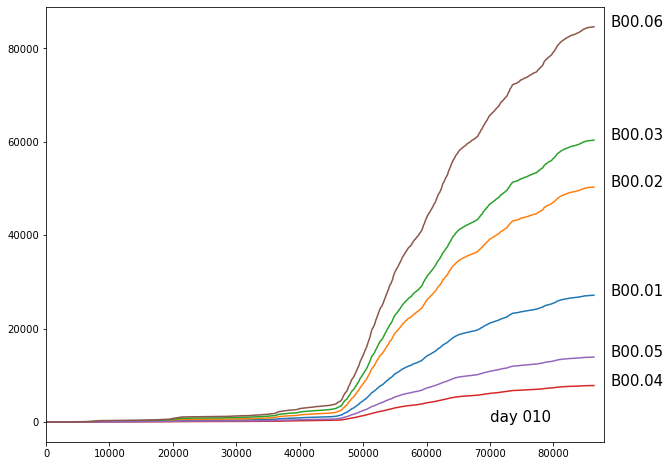

In [147]:

station_times = pd.DataFrame()

days = ['138', '140', '221', '222', '272','274','342', '007', '010']

for day in days:
    path = ('/media/sda/data/robdata/tremors/{}.mseed'.format(day),)
    stream = load.get_raw_stream(paths=path)
    stream.integrate()
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # statlocs = []
    for tr in stream:
        one_row = pd.DataFrame({'hidx':(tr.stats.location,)
                                , 'didx': (day,)
                                , 'max_amp':(tr.data.max(),)
                                , 'datetime':(tr.stats.starttime,)
                                , 'station_name':(tr.stats.station+'.'+tr.stats.location,)
                               })
        station_times = pd.concat([station_times, one_row])
        # statlocs.append((int(tr.stats.location), day, tr.data.max()))
        station_name = tr.stats.station + '.' + tr.stats.location
        ax.plot(tr.times(), tr.data)
        ax.text(s=station_name, x=89000, y=tr.data.max()
               ,fontsize=15)
    
    ax.text(s='day {}'.format(day), x=70000, y=100, fontsize=15)

    ax.set_xlim(0, 88000)
    del stream
    # station_locations.append(np.array(statlocs).flatten()), 
    
station_times.reset_index(inplace=True)
station_times['datetime'] = pd.to_datetime(pd.to_datetime(station_times['datetime'].astype(str),).apply(lambda x:str(x).split(' ')[0]))
station_times['hidx'] = station_times.hidx.astype(int)

In [148]:
tr.stats.starttime

2020-01-10T00:00:00.270001Z

In [149]:
station_times = station_times.sort_values(by=['didx', 'max_amp'])
# station_times.set_index('datetime', inplace=True)

In [150]:
# fig, ax =plt.subplots(figsize=(10, 9))
# station_times.pivot_table(index='hidx', columns='datetime', values='max_amp', aggfunc=np.log10).transpose().plot(ax=ax)
# ax.legend()

In [151]:
station_times['order'] = (1, 2, 3, 4, 5, 6)*9

Text(0, 0.5, 'Ordered by Amplitude Magnitude')

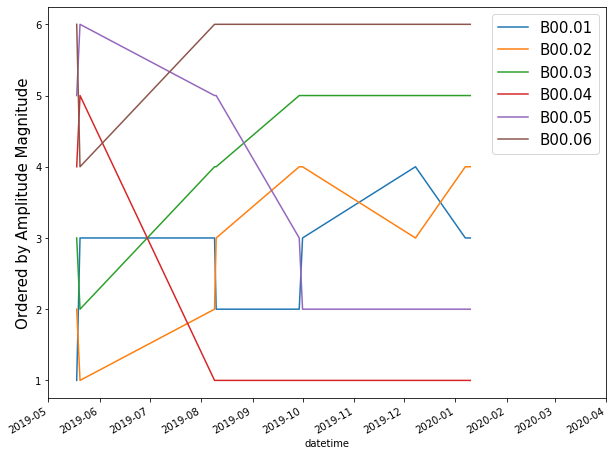

In [152]:
fig, ax = plt.subplots(figsize=(10, 8))
station_times.pivot_table(index='hidx', columns='datetime', values='order').transpose().plot(ax=ax)
ax.set_xlim(pd.to_datetime('2019-05-01'), pd.to_datetime('2020-04-01'))
ax.legend(sorted(station_times.station_name.unique()), fontsize=15)
ax.set_ylabel('Ordered by Amplitude Magnitude', fontsize=15)

Text(0, 0.5, 'Ordered by Amplitude Magnitude')

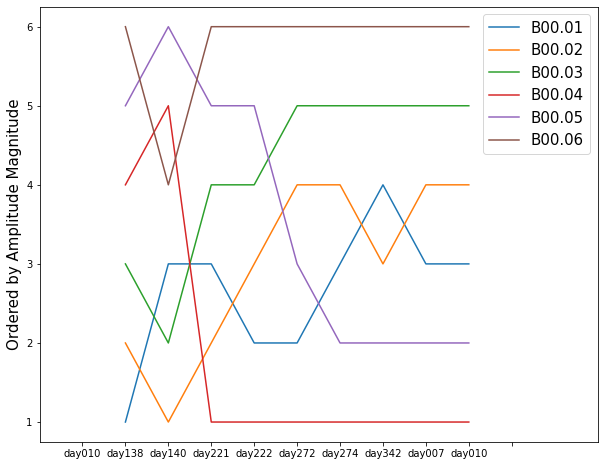

In [159]:
better = station_times.pivot_table(index='hidx', columns='datetime', values='order').transpose()

better.index = ['day'+d for d in days]

fig, ax = plt.subplots(figsize=(10, 8))
better.plot(ax=ax)
ax.set_xlim(-2, 11)
ax.legend(sorted(station_times.station_name.unique()), fontsize=15)
ax.set_ylabel('Ordered by Amplitude Magnitude', fontsize=15)

In [161]:
better

hidx,1,2,3,4,5,6
day138,1,2,3,4,5,6
day140,3,1,2,5,6,4
day221,3,2,4,1,5,6
day222,2,3,4,1,5,6
day272,2,4,5,1,3,6
day274,3,4,5,1,2,6
day342,4,3,5,1,2,6
day007,3,4,5,1,2,6
day010,3,4,5,1,2,6
